# -----------------------------librerías extra

In [2]:
using ProgressMeter
using Cubature
using PyPlot

In [3]:
using Graf
using nintegrate

# ----------------------------constantes

### ----------------------------

In [16]:
const hbarr=6.62606957e-34;
const Kb=1.3806488e-23
m=144.42e-27/2;

omegaz =150.0
omegar =omegaz;

Npart=10.0^7.0;
n=10.0^20.0;
alfa=5.8e-9;
g_alfa=4.0*π*hbarr^2*alfa/m;
omegam=(omegar^2*omegaz)^(1/3);
mu=(hbarr/2) *(2*sqrt(omegar)+omegaz)#0.5*hbarr*omegam*(15*Npart*alfa*sqrt(m*omegam/hbarr))^(2.0/5.0);
c = sqrt(n*g_alfa/m);


#------------Parámetros característicos del solitón bosónico
ksi=1/sqrt(4*pi*n*alfa);
beta=0.0;
algo=5.0
z0=algo*ksi;
gama=1/(sqrt(1-beta^2));

   ### ----Función de onda en coordenadas $\tilde{r},\tilde{z} * \sqrt{sin(\omega_{r,z})}=r,z $ en coordenadas OA

In [49]:
#al final queremos sólo N^2
NOA=omegar*sqrt(omegaz)/omegam^(3/2)/sqrt(2*π)

function sol(z::Float64,t)
    tanh((z*sqrt(abs(sin(omegaz*t)))-z0)/(ksi*gama))/gama
end

function fase_rr1(r1::Float64,r::Float64,t::Float64)
    (m*omegar/(2*hbarr))*(r1^2+r^2)*cos(omegar*t) + π/4
end

function fase_zz1(z1::Float64,z::Float64,t::Float64)
    (m*omegaz/(2*hbarr))*((z1^2+z^2)*cos(omegaz*t)-2*z*z1)
end


function Bessel0(r1::Float64,r::Float64)
    besselj0(abs(m*omegar*r*r1/hbarr))
end

function U(r::Float64,z::Float64,t::Float64)
    (1/2)*m*((omegar*r)^2*sin(omegar*t) + (omegaz*z)^2*sin(omegaz*t))
end

function n_tf(r::Float64,z::Float64,t::Float64)            
    if  mu-U(r,z,t)>0 0
        return (mu-U(r,z,t))/(n*g_alfa)              
    end
    return 0       
end





function Rre(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*cos(fase_rr1(r1,r,t))
end



function Rim(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*sin(fase_rr1(r1,r,t))
end



function Zre(z1::Float64,z::Float64,t::Float64)
    sin(fase_zz1(z1,z,t))*sol(z1,t)+beta*cos(fase_zz1(z1,z,t))
end



function Zim(z1::Float64,z::Float64,t::Float64)
    cos(fase_zz1(z1,z,t))*sol(z1,t)-beta*sin(fase_zz1(z1,z,t))
end



function R_funcion_a_integrar1(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)
end

function R_funcion_a_integrar2(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    -Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)
end

function I_funcion_a_integrar1(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)
end

function I_funcion_a_integrar2(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)
end


function funcion_real_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    R_funcion_a_integrar1(r1,z1,r,z,t)+R_funcion_a_integrar2(r1,z1,r,z,t)
end



function funcion_imag_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    I_funcion_a_integrar1(r1,z1,r,z,t)+I_funcion_a_integrar2(r1,z1,r,z,t)
end


funcion_real_a_integrar(v::Vector{Float64},r,z,t)=funcion_real_a_integrar(v[1],v[2],r,z,t)
funcion_imag_a_integrar(v::Vector{Float64},r,z,t)=funcion_imag_a_integrar(v[1],v[2],r,z,t)



funcion_imag_a_integrar (generic function with 5 methods)

In [63]:
function rmaxintegrar(t::Float64)
    sqrt(omegam)/omegar*sqrt(2*mu/(hbarr*abs(sin(omegar*t))))
end

function zmaxintegrar(t::Float64)
    sqrt(omegam)/omegaz*sqrt(2*mu/(hbarr*abs(sin(omegaz*t))))
end


rmaxevaluar(t)=rmaxintegrar(t);
zmaxevaluar(t)=zmaxintegrar(t);

# Para el perfil inicial

resolucion=1000;

perfilinicial=zeros(resolucion+1,resolucion+1)



function ρ0(r::Float64,z::Float64)
    FUNCIONTF0(r,z) *conj(FUNCIONTF0(r,z))
end

perfilinicial=gencodominio2D([zminevaluar,zmaxevaluar],[rminevaluar,rmaxevaluar],resolucion,ρ0);
grafdensidad([zminevaluar/ksi,zmaxevaluar/ksi],[rminevaluar/ksi,rmaxevaluar/ksi],resolucion+1, perfilinicial,"Perfil Inicial","z","r","barra")
#savefig("perfilinicial con ksi=$ksi,z0=$algo*ksi.png")

# ----------------------------------------------------------------------------------------------

# EL TIEMPO

In [64]:
t0=1/omegam;
#t1=1/sqrt(omegar^2+omegaz^2);
t1=ksi/c;
DT=1;
t0=t0/DT;
t1=t1/DT

1.4952144861754726e-5

In [65]:
t0/t1

445.8669126272961

#Parámetros de resolución

In [66]:
iteracionest=10;
divisiones=10;

iteracionesr=Integer(100);
iteracionesz=Integer(100);

iteracionesr1=iteracionesr+(divisiones-1)*(iteracionesr-1);
iteracionesz1=iteracionesz+(divisiones-1)*(iteracionesz-1);


Dr(t)=(rmaxevaluar(t))/iteracionesr;
Dz(t)=(2*zmaxevaluar(t))/iteracionesz;

Dr1(t)=(rmaxintegrar(t))/iteracionesr1;
Dz1(t)=(2*zmaxintegrar(t))/iteracionesz1;



#Dr=(rmaxevaluar-rminevaluar)/iteracionesr;
#Dz=(zmaxevaluar-zminevaluar)/iteracionesz;



#################NO SE TOMAN TODOS LOS ÍNDICES DE INTEGRACIÓN, SÓLO ALGUNOS cercanos al punto dado
#Dr1_omegar=sqrt(hbarr/(m*omegar)); #Dr1_omegar>Dr1
#Dz1_omegaz=sqrt(hbarr/(m*omegaz)); #Dz1_omegaz>Dr1

Dr1_omegar(t)=Dr1(t)*20;
Dz1_omegaz(t)=Dz1(t)*20;

############valores en índices
dzl0(t)=    round(Integer,Dz1_omegaz(t)/Dz1(t));
drk0(t)=    round(Integer,Dr1_omegar(t)/Dr1(t)); #a lo más, se va a integrar 2*drk0*N_arbitrario puntos+1 al rededor de un punto dado (contando al punto)
###########################################################################



drk0 (generic function with 1 method)

## Arreglos prehechos para guardar todo:

fRre=mapear_funcion_2d_y_t(Rre,iteracionesr,0.0,Dr,iteracionesr1,0.0,Dr1,iteracionest,t0);
fRim=mapear_funcion_2d_y_t(Rim,iteracionesr,0.0,Dr,iteracionesr1,0.0,Dr1,iteracionest,t0);
gZre=mapear_funcion_2d_y_t(Zre,iteracionesz,zminevaluar,Dz,iteracionesz1,zminintegrar,Dz1,iteracionest,t0);
gZim=mapear_funcion_2d_y_t(Zim,iteracionesz,zminevaluar,Dz,iteracionesz1,zminintegrar,Dz1,iteracionest,t0);



In [67]:
ReIntegral=zeros(iteracionesr+1,iteracionesz+1,iteracionest);
ImIntegral=zeros(iteracionesr+1,iteracionesz+1,iteracionest);
Z1=zeros(iteracionesr+1,iteracionesz+1,iteracionest);


In [68]:
ReIntegralcubature=zeros(iteracionesr+1,iteracionesz+1,iteracionest);
ImIntegralcubature=zeros(iteracionesr+1,iteracionesz+1,iteracionest);
Zcubature=zeros(iteracionesr+1,iteracionesz+1,iteracionest);
ErrIm=zeros(iteracionesr+1,iteracionesz+1);
ErrRe=zeros(iteracionesr+1,iteracionesz+1);

In [70]:
#tiempos=[5,6,7,8,9]

#q=Progress(iteracionest+1,1)

for τ in 1:iteracionest
    
    t=τ*t0
    

    p=Progress(iteracionesr+1,1)
    
    for i in 1: iteracionesr+1    
        #println("i====================$i") 
        r=(i-1)*Dr(t);    
       #println("r=============================================$r") 
            
        for j in 1: iteracionesz+1
        #println("j===========$j") 
            z=-zmaxevaluar(t)+(j-1)*Dz(t);    
            #println("z======================$z") 

        
#          i1=i+(divisiones-1)*(i-1);
#        kmin= valor_i_abajo(i1,drk0); #i-Dr1 expresado en la malla de integración con reglas
    #        kmax= valor_i_arriba(i1,drk0,iteracionesr1); #i1+Dr1 con reglas

            
#            j1=j+(divisiones-1)*(j-1);    
#            lmin= valor_i_abajo(j1,dzl0);  #j-Dz1 expresado en la malla de integración con reglas
#            lmax= valor_i_arriba(j1,dzl0,iteracionesz1); #j+Dz1 expresado en la malla de integración con reglas

            
          
#            for k in kmin: kmax #induce error de redondeo    
                #for k in 1: iteracionesr1+1
#                    r1=(k-1)*Dr1;

            #println("k====$k") 
                    #println("r1===============$r1")
                    #println("kmax====$(indicializar(r1_maximo,rminintegrar,Dr1))")

                    #println("r1===","$r1")

                
#                for l in lmin: lmax #induce error de redondeo
#                z1=zminevaluar+(l-1)*Dz1;
                            #println("l==$l")   
                            #println("$(indicializar(r1_minimo,rminintegrar,Dr1))", "$(indicializar(r1_maximo,rminintegrar,Dr1))")
                            #println("lmin==$(indicializar(z1_minimo,zminintegrar,Dz1))")
                            #println("lmax==$(indicializar(r1_minimo,zminintegrar,Dz1))")
                            #println("z1=","$z1")



                    

                            #Llamando los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:

                            #ReIntegral[i,j,τ]=ReIntegral[i,j,τ]+n_tf(r1,z1)*(fRre[i,k,τ]*gZre[j,l,τ]-fRim[i,k,τ]*gZim[j,l,τ])*Dr1*Dz1;   
                            #ImIntegral[i,j,τ]=ImIntegral[i,j,τ]+n_tf(r1,z1)*(fRre[i,k,τ]*gZim[j,l,τ]+fRim[i,k,τ]*gZre[j,l,τ])*Dr1*Dz1;


                            #Sin llamar los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                            #ReIntegral[i,j,τ]=ReIntegral[i,j,τ]+n_tf(r1,z1)*(Rre(r,r1,t)*Zre(z,z1,t)-Rim(r,r1,t)*Zim(z,z1,t))*Dr1*Dz1;
                            #ImIntegral[i,j,τ]=ReIntegral[i,j,τ]+n_tf(r1,z1)*(Rre(r,r1,t)*Zim(z,z1,t)+Rim(r,r1,t)*Zre(z,z1,t))*Dr1*Dz1;
            
            
            
            
            
                            #Si QUIERES usar los programas anteriores debes quitar las integraciones en k y l y usar:
                               f(v)=funcion_real_a_integrar(v,r,z,t);
                               g(v)=funcion_imag_a_integrar(v,r,z,t);
                            
                        
                                (val,err) = pcubature(f,[0.0,-zmaxintegrar(t)],[rmaxintegrar(t),zmaxintegrar(t)]; reltol=1e-30, abstol=1e-30, maxevals=1000000);
                                (val2,err2) = pcubature(g,[0.0,-zmaxintegrar(t)],[rmaxintegrar(t),zmaxintegrar(t)]; reltol=1e-30, abstol=1e-30, maxevals=1000000);
                            
            
            #sacar los errores
            
                                ReIntegralcubature[i,j,τ]=val
                                ImIntegralcubature[i,j,τ]=val2    
                                ErrRe[i,j]=err;  
                                ErrIm[i,j]=err2;
          
 #                       end 
        
       
 #               end
        
            end
        next!(p)
    
        end
    
    #Z[:,:,τ]=Ncuad(t)*(ReIntegral[:,:,τ].^2+ImIntegral[:,:,τ].^2);
    #Zcubature[:,:,τ]=NOA(t)^2*(ReIntegralcubature[:,:,τ].^2+ImIntegralcubature[:,:,τ].^2);
    
 
    #grafdensidad([zminevaluar/ksi,zmaxevaluar/ksi],[rminevaluar/ksi,rmaxevaluar/ksi],iteracionesr+1,Zcubature[:,:,τ],"Perfil Propagado a t=$τ *T0/$DT","z","r")    
    #savefig("fig$τ entre $DT con resol de $iteracionesz*$iteracionesr.png")
    #savefig("fig$τ entre $DT con $drk0 de r y $dzl0 de z resol de $iteracionesz*$iteracionesr.png")

    #next!(q)

end

Progress: 100% Time: 0:00:02


LoadError: LoadError: MethodError: `call` has no method matching call(::Float64, ::Float64)
Closest candidates are:
  BoundsError()
  BoundsError(!Matched::Any...)
  DivideError()
  ...
while loading In[70], in expression starting on line 5

# Zcubature(t0) y Z1(t1) están llenos

In [186]:
ErrIm

101x101 Array{Float64,2}:
 1.54661e-18  1.12866e-18  3.72767e-18  …  1.12866e-18  1.54661e-18
 7.12008e-21  1.51461e-20  1.61697e-20     1.51461e-20  7.12008e-21
 4.88809e-20  6.03939e-20  1.58322e-19     6.03939e-20  4.88809e-20
 1.22735e-19  2.05349e-19  1.87405e-19     2.05349e-19  1.22735e-19
 3.94736e-21  9.17121e-20  1.55065e-19     9.17121e-20  3.94736e-21
 3.21996e-20  3.92868e-20  2.52655e-20  …  3.92868e-20  3.21996e-20
 3.01428e-20  6.52277e-20  7.02678e-20     6.52277e-20  3.01428e-20
 1.34572e-19  1.13379e-19  2.23352e-20     1.13379e-19  1.34572e-19
 1.05471e-19  1.21561e-19  7.10852e-20     1.21561e-19  1.05471e-19
 4.18177e-20  1.4699e-20   2.67031e-20     1.4699e-20   4.18177e-20
 3.56654e-20  2.24427e-20  6.54307e-21  …  2.24427e-20  3.56654e-20
 5.51514e-21  5.56579e-20  9.78942e-20     5.56579e-20  5.51514e-21
 3.46312e-20  3.36306e-20  9.71637e-20     3.36306e-20  3.46312e-20
 ⋮                                      ⋱               ⋮          
 2.67985e-21  1.88982e

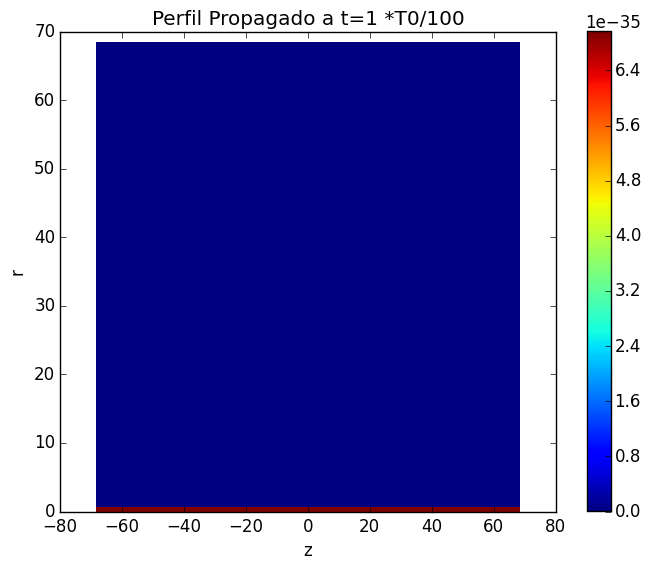

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f0acdcc8518>

In [187]:
τ=1;
grafdensidad([zminevaluar/ksi,zmaxevaluar/ksi],[rminevaluar/ksi,rmaxevaluar/ksi],iteracionesr+1,Z1[:,:,τ],"Perfil Propagado a t=$τ *T0/$DT","z","r","color")



B=zeros(1001,1001,10);
for i in 1:10
    comodin=readdlm("salida se soliton real a tiempos t1*$i.dat")
    B[:,:,i]=comodin
end


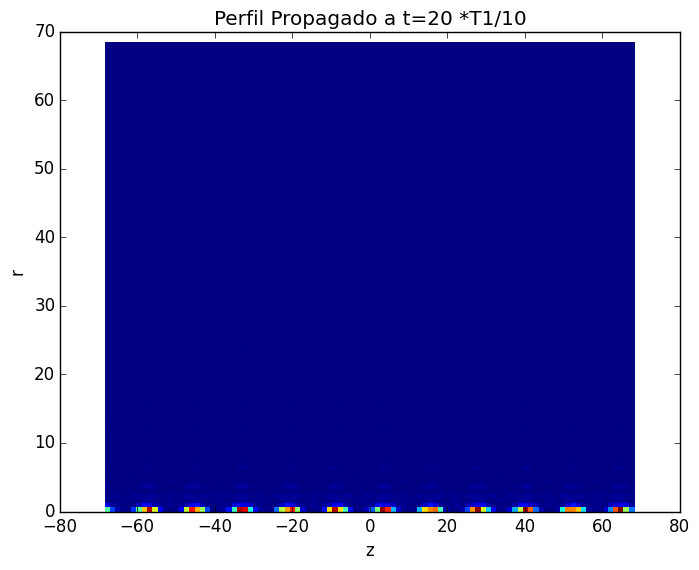

In [131]:
for i in 1:iteracionest
grafdensidad([zminevaluar/ksi,zmaxevaluar/ksi],[rminevaluar/ksi,rmaxevaluar/ksi],iteracionesr+1,Z1[:,:,i],"Perfil Propagado a t=$i *T1/$DT","z","r")    
savefig("fig$i *t1 entre $DT con resol de $iteracionesz*$iteracionesr.png")
end

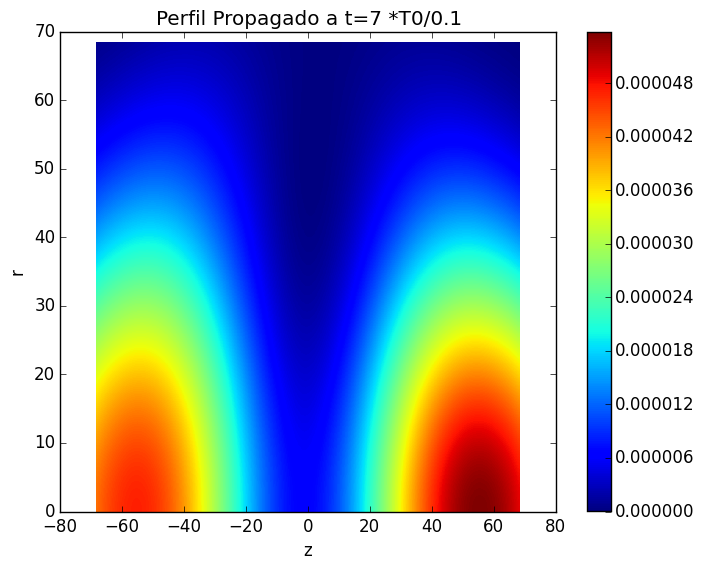

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f52f44dae60>

In [46]:
τ=7
grafdensidad([zminevaluar/ksi,zmaxevaluar/ksi],[rminevaluar/ksi,rmaxevaluar/ksi],iteracionesr+1,Z1[:,:,τ],"Perfil Propagado a t=$τ *T0/$DT","z","r","color")    


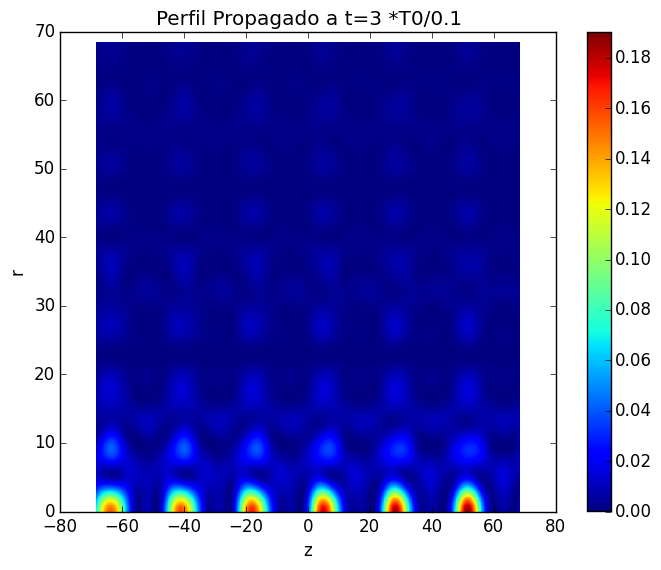

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f52f49a4a70>

In [48]:
τ=3

grafdensidad([zminevaluar/ksi,zmaxevaluar/ksi],[rminevaluar/ksi,rmaxevaluar/ksi],iteracionesr+1,Zcubature[:,:,τ],"Perfil Propagado a t=$τ *T0/$DT","z","r","color")    


# ----------------------------------------------------------------------------------------------

#El perfil inicial 

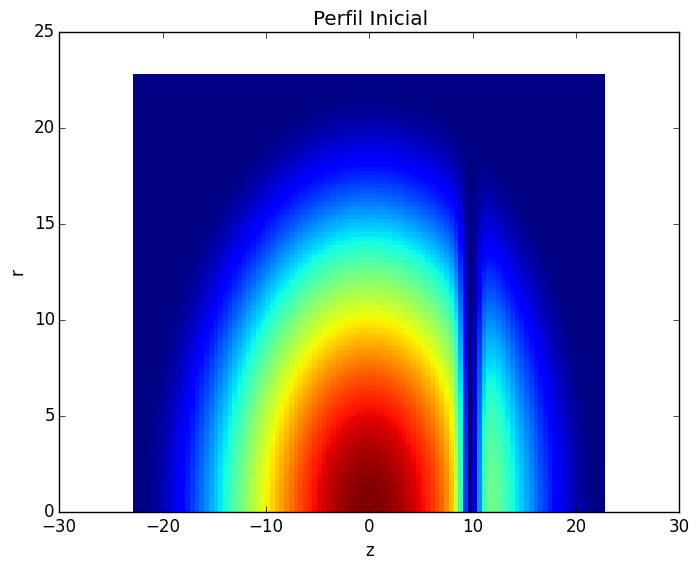

In [131]:
resolucion=100;

perfilinicial=zeros(resolucion+1,resolucion+1)

function FUNCIONTF0(r::Float64,z::Float64)
    n_tf(r,z)*(sol(z)+im*beta)
end

function FUNCIONTF0(v::Vector{Float64})
    FUNCIONTF0(v[1],v[2])
end


function ρ0(r::Float64,z::Float64)
    FUNCIONTF0(r,z) *conj(FUNCIONTF0(r,z))
end

perfilinicial=gencodominio2D([zminevaluar,zmaxevaluar],[rminevaluar,rmaxevaluar],resolucion,ρ0);
grafdensidad([zminevaluar/ksi,zmaxevaluar/ksi],[rminevaluar/ksi,rmaxevaluar/ksi],resolucion+1, perfilinicial,"Perfil Inicial","z","r")
savefig("perfilinicial con ksi=$ksi,z0=$algo*ksi.png")

In [70]:
zminevaluar/ksi

-252.6862552144671

In [41]:
zmaxevaluar/ksi

32.025483939556835

In [66]:
rmaxintegrar/ksi

7.175686345979975